In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
rating = pd.read_csv("../data/clean_ratings.csv")
prof = pd.read_csv("../data/clean_prof_info.csv")

In [3]:
print(rating.describe())
rating.head(1)

             profID  difficultyRating  helpfulRating
count  5.165000e+04      51630.000000   51630.000000
mean   1.038128e+06          2.999806       3.801511
std    7.262400e+05          1.179900       1.445799
min    7.775000e+03          1.000000       1.000000
25%    4.294040e+05          2.000000       3.000000
50%    8.951030e+05          3.000000       4.000000
75%    1.656242e+06          4.000000       5.000000
max    2.880778e+06          5.000000       5.000000


,profID,attendanceMandatory,class,comment,date,difficultyRating,grade,helpfulRating,isForCredit,isForOnlineClass,ratingTags,wouldTakeAgain
0,7964,False,ANTHRCUL101,Fricke is the man. Entire class probably took ...,2019-04-28 17:13:12,1.0,A,5.0,False,False,"['Respected', 'Inspirational', 'Amazing Lectur...",True


In [4]:
print(prof.describe())
prof.head(1)


             profID  avgDifficulty    avgRating   numRatings  \
count  4.612000e+03    4612.000000  4612.000000  4612.000000   
mean   1.618646e+06       2.573873     3.321856    11.217259   
std    7.479321e+05       1.291814     1.638654    24.021507   
min    7.775000e+03       0.000000     0.000000     0.000000   
25%    1.034196e+06       2.000000     2.500000     1.000000   
50%    1.707614e+06       2.900000     3.900000     5.000000   
75%    2.237500e+06       3.500000     4.600000    12.000000   
max    2.886910e+06       5.000000     5.300000   652.000000   

       wouldTakeAgainPercent  
count            2601.000000  
mean               73.858516  
std                34.098071  
min                 0.000000  
25%                50.000000  
50%                98.000000  
75%               100.000000  
max               100.000000  


,profID,avgDifficulty,avgRating,department,firstName,lastName,numRatings,wouldTakeAgainPercent,fullName
0,7775,2.3,4.4,Mechanical Engineering,Alan,Wineman,34,80.0,Alan Wineman


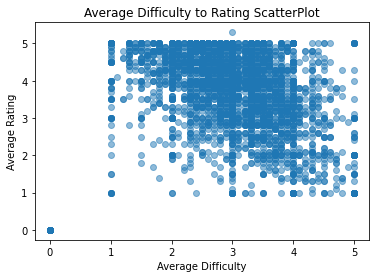

In [6]:
plt.scatter(x=prof["avgDifficulty"], y=prof["avgRating"], alpha=0.5)
plt.xlabel("Average Difficulty")
plt.ylabel("Average Rating")
plt.title("Average Difficulty to Rating ScatterPlot")
plt.show()

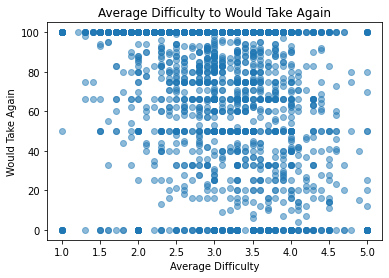

In [7]:
plt.scatter(x=prof["avgDifficulty"], y=prof["wouldTakeAgainPercent"], alpha=0.5)
plt.xlabel("Average Difficulty")
plt.ylabel("Would Take Again")
plt.title("Average Difficulty to Would Take Again")
plt.show()


Mean Difficulty 2.5738725065047703
Mean Rating 3.3218560277536864


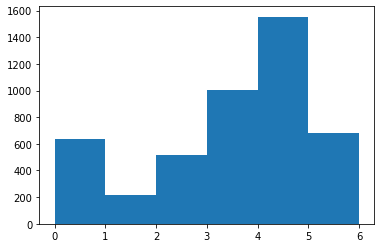

In [17]:
print(f'Mean Difficulty {prof["avgDifficulty"].mean()}')
print(f'Mean Rating {prof["avgRating"].mean()}')
# Define the bin edges
bin_edges = np.arange(0, prof["avgRating"].max() + 1, 1)

# Plot the histogram with the defined bin edges
plt.hist(prof["avgRating"], bins=bin_edges)

# Show the plot
plt.show()

In [32]:
index = prof['avgRating'].idxmax()
prof_name = prof.loc[index, 'fullName']
print(f"Highest rating professor: {prof['avgRating'].max()} {prof_name}")
index = prof['avgRating'].idxmin()
prof_name = prof.loc[index, 'fullName']
print(f"Highest rating professor: {prof['avgRating'].min()} {prof_name}")


# Note that N/A professors have a rating of 0? What should we do to the data to ensure 
# a better reflection of actual faculty rating. Note that a lot of them have 0 numRatings,
# should they be considered? 
lowest_rated_prof = prof.nsmallest(20, 'avgRating')
lowest_rated_prof


Highest rating professor: 5.3 Shelly Schreier
Highest rating professor: 0.0 Daphne Swabey


,profID,avgDifficulty,avgRating,department,firstName,lastName,numRatings,wouldTakeAgainPercent,fullName
6,10262,0.0,0.0,English,Daphne,Swabey,0,NaN,Daphne Swabey
80,170446,0.0,0.0,Mathematics,Peter,Hinman,0,NaN,Peter Hinman
269,464417,0.0,0.0,Mechanical Engineering,Alan,Argento,0,NaN,Alan Argento
317,521957,0.0,0.0,Mathematics,Brendan,Weickert,0,NaN,Brendan Weickert
354,550563,0.0,0.0,Pharmacy,Rivka,Siden,0,NaN,Rivka Siden
487,685187,0.0,0.0,Naval Science,Klaus-Peter,Beier,0,NaN,Klaus-Peter Beier
488,685189,0.0,0.0,Pharmacy,Manju Taneja,Beier,0,NaN,Manju Taneja Beier
587,801586,0.0,0.0,Scandinavian,Laura,Miller,0,NaN,Laura Miller
599,813266,0.0,0.0,Biomedical,Randal,Kaufman,0,NaN,Randal Kaufman
663,866647,0.0,0.0,Nursing,Barbara,Christy,0,NaN,Barbara Christy


In [48]:
prof = prof[prof["numRatings"]!=0]
lowest_rated_prof = prof.nsmallest(20, 'avgRating')
lowest_rated_prof


,profID,avgDifficulty,avgRating,department,firstName,lastName,numRatings,wouldTakeAgainPercent,fullName
102,192609,3.3,1.0,Materials Engineering,Rachel,Goldman,26,0.0,Rachel Goldman
179,335309,4.6,1.0,Biomedical,Shuichi,Takayama,7,NaN,Shuichi Takayama
508,765869,4.1,1.0,Mechanical Engineering,Jyotirmoy,Mazumder,11,0.0,Jyotirmoy Mazumder
836,1042580,3.0,1.0,Natural Resources,Greg,Keoleain,1,0.0,Greg Keoleain
917,1088937,5.0,1.0,Political Science,Kent,Jennings,4,NaN,Kent Jennings
1016,1207644,4.5,1.0,Social Work,Kim,Clum,2,NaN,Kim Clum
1105,1258944,4.0,1.0,Medicine,Rebecca,Minter,1,NaN,Rebecca Minter
1162,1274874,4.0,1.0,Business,Jeff,Degraff,1,0.0,Jeff Degraff
1175,1280075,5.0,1.0,Information Science,Cory,Knobel,1,NaN,Cory Knobel
1333,1447033,4.5,1.0,Business,Andy,Lawlor,2,NaN,Andy Lawlor


Landscape Studies
1.0


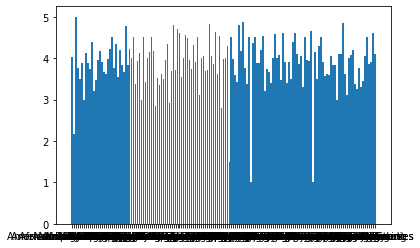

In [62]:
prof = prof[prof["numRatings"]!=0]
by_department = prof.groupby("department")["avgRating"].mean()
plt.bar(by_department.index, by_department.values)
print(by_department.idxmin())
print(by_department.loc[by_department.idxmin()])

## Sentiment Analysis

In [31]:
import nltk